In [7]:
# colab setup
import os
import subprocess as sp
import sys
from pathlib import Path

from rich.console import Console

console = Console()

# --- Colab detection ---
try:
    import google.colab  # noqa

    IS_COLAB = True
except ImportError:
    IS_COLAB = False

REPO = "https://github.com/haeussma/chromhandler-example.git"
BRANCH = "main"

# --- Colab-only repo setup ---
if IS_COLAB:
    base = Path("/content")
    name = Path(REPO).name.removesuffix(".git")
    dest = base / name
    if dest.exists():
        sp.run(["git", "-C", str(dest), "fetch", "origin", BRANCH], check=True)
        sp.run(["git", "-C", str(dest), "checkout", BRANCH], check=True)
        sp.run(
            ["git", "-C", str(dest), "reset", "--hard", f"origin/{BRANCH}"], check=True
        )
    else:
        sp.run(
            ["git", "clone", "--depth", "1", "--branch", BRANCH, REPO, str(dest)],
            check=True,
        )
    if Path.cwd().resolve() != dest.resolve():
        os.chdir(dest)
    console.log(f"Current directory: [bold]{Path.cwd()}[/]")
else:
    pass

# --- Colab-only install ---
if IS_COLAB:
    cmd = [
        sys.executable,
        "-m",
        "pip",
        "install",
        "chromhandler>=0.10.2",
        "ipywidgets>=8.1.7",
        "ipykernel>=6.30.1",
        "git+https://github.com/JR-1991/Catalax@master",
    ]
    with console.status("[bold green]Installing packages…[/]", spinner="dots"):
        sp.run(
            [
                sys.executable,
                "-m",
                "pip",
                "install",
                "-U",
                "pip",
                "setuptools",
                "wheel",
            ],
            check=True,
        )
        sp.run(cmd, check=True)
else:
    pass

# --- Import with friendly error ---
try:
    import chromhandler as ch  # noqa: F401
except ImportError as e:
    console.print(f"[bold red]ImportError:[/] {e}")
    console.print(
        "[red]If this was a fresh install in Colab/Jupyter, restart the kernel and run the cell again.[/]"
    )
    raise

In [8]:
from pathlib import Path

import chromhandler as ch
import pandas as pd

In [9]:
# load molecules in
adenine = ch.Molecule.read_json("data/molecules/adenine.json")
adenosine = ch.Molecule.read_json("data/molecules/adenosine.json")

# load enzymes
SAHH = ch.Protein.read_json("data/proteins/SAHH.json")

# load initial conditions
inits = pd.read_csv("data/hplc/init_conditions.csv").set_index("sample_id")
inits

,adenosine,adenine,SAHH
sample_id,,,
CF6,300,0,0.08125
CF7,125,0,0.08125
CF8,100,0,0.08125
CF9,75,0,0.08125
CF10,50,0,0.08125


Loaded 7 chromatograms.


              🎯 Peak Assignment Summary of CF6              
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Molecule              ┃   Status   ┃ Details              ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ adenine (adenine)     │ 🟡 Partial │ (4/7) peaks assigned │
│ adenosine (adenosine) │ ✅ Success │ (7/7) peaks assigned │
└───────────────────────┴────────────┴──────────────────────┘

Loaded data/hplc/kinetics/CF6


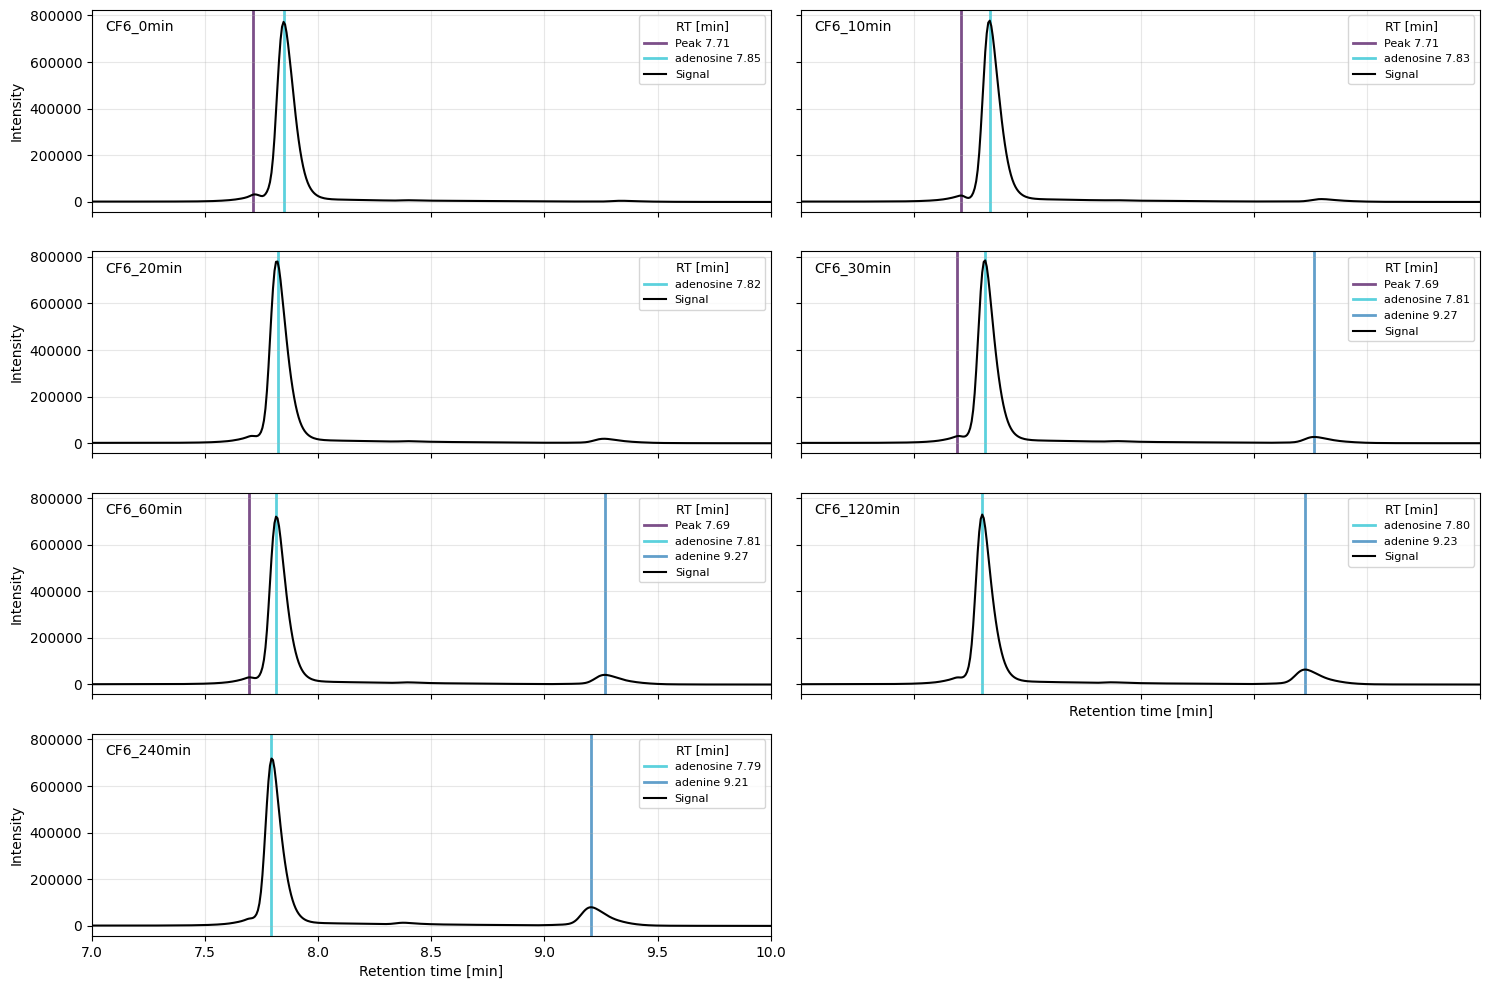

Loaded 7 chromatograms.


              🎯 Peak Assignment Summary of CF8              
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Molecule              ┃   Status   ┃ Details              ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ adenine (adenine)     │ 🟡 Partial │ (6/7) peaks assigned │
│ adenosine (adenosine) │ ✅ Success │ (7/7) peaks assigned │
└───────────────────────┴────────────┴──────────────────────┘

Loaded data/hplc/kinetics/CF8


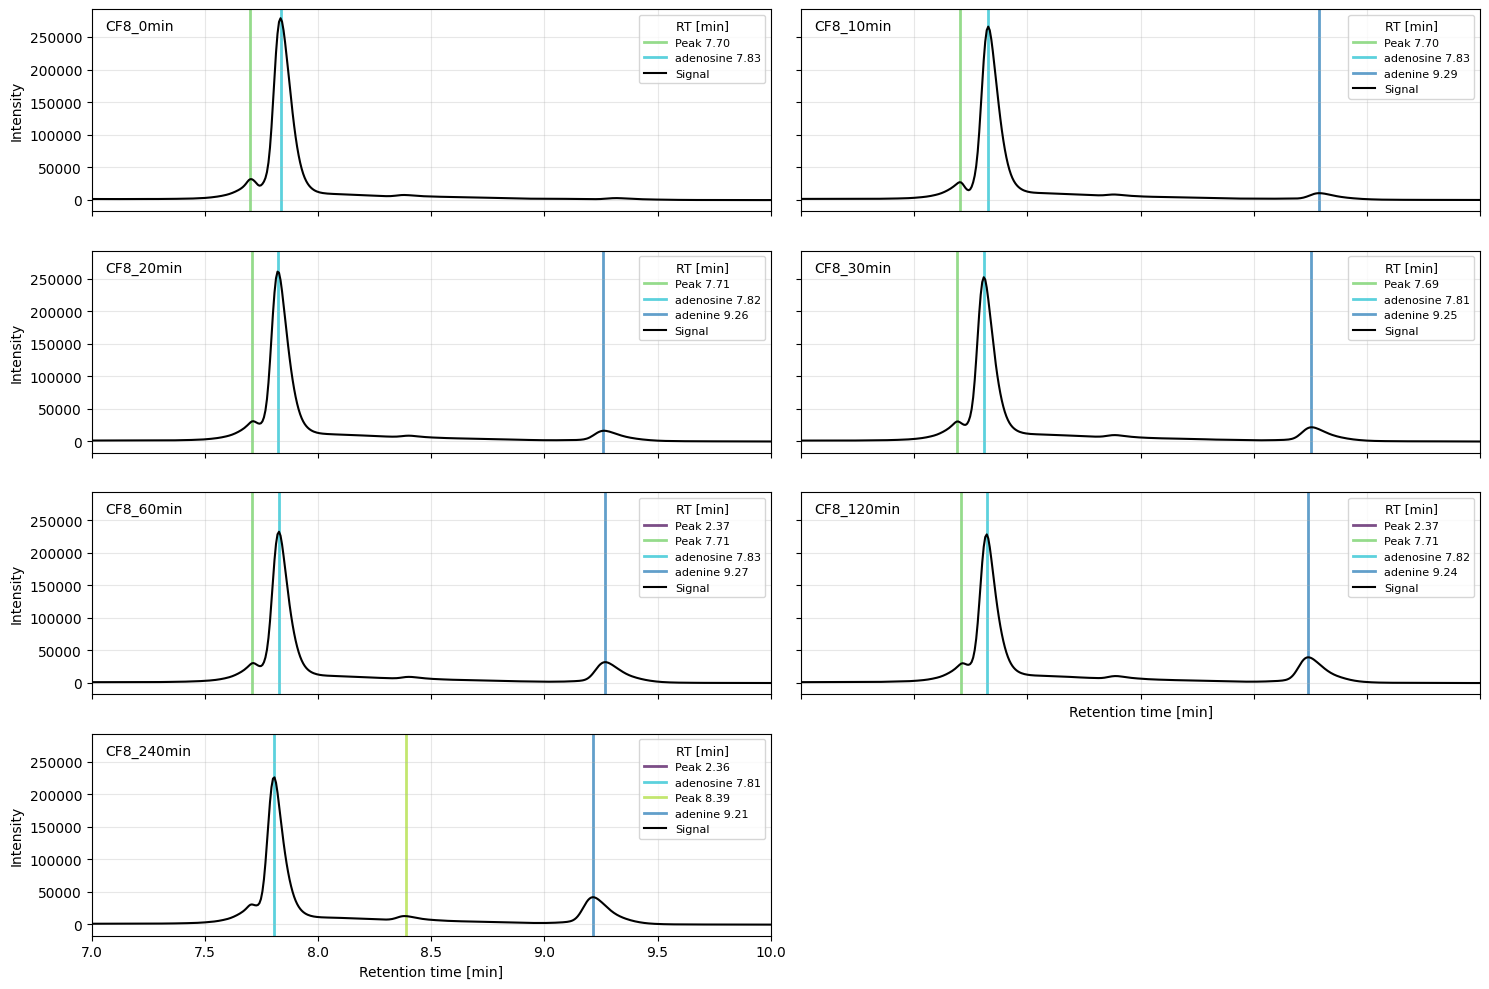

Loaded 7 chromatograms.


              🎯 Peak Assignment Summary of CF9              
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Molecule              ┃   Status   ┃ Details              ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ adenine (adenine)     │ 🟡 Partial │ (6/7) peaks assigned │
│ adenosine (adenosine) │ ✅ Success │ (7/7) peaks assigned │
└───────────────────────┴────────────┴──────────────────────┘

Loaded data/hplc/kinetics/CF9


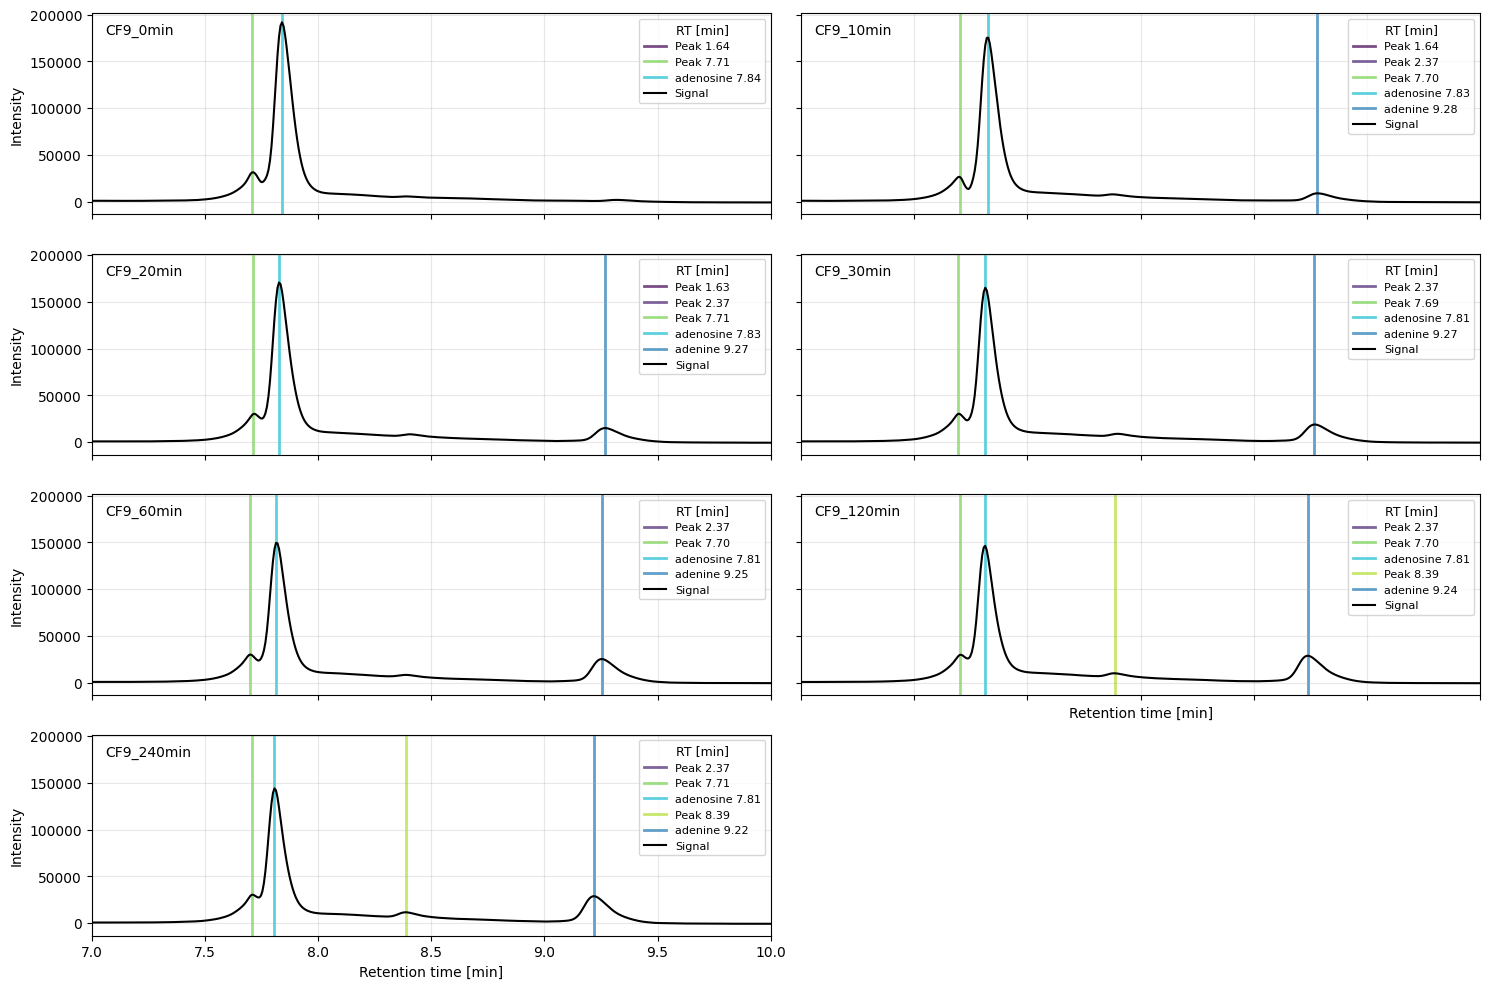

Loaded 7 chromatograms.


              🎯 Peak Assignment Summary of CF7              
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Molecule              ┃   Status   ┃ Details              ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ adenine (adenine)     │ 🟡 Partial │ (6/7) peaks assigned │
│ adenosine (adenosine) │ ✅ Success │ (7/7) peaks assigned │
└───────────────────────┴────────────┴──────────────────────┘

Loaded data/hplc/kinetics/CF7


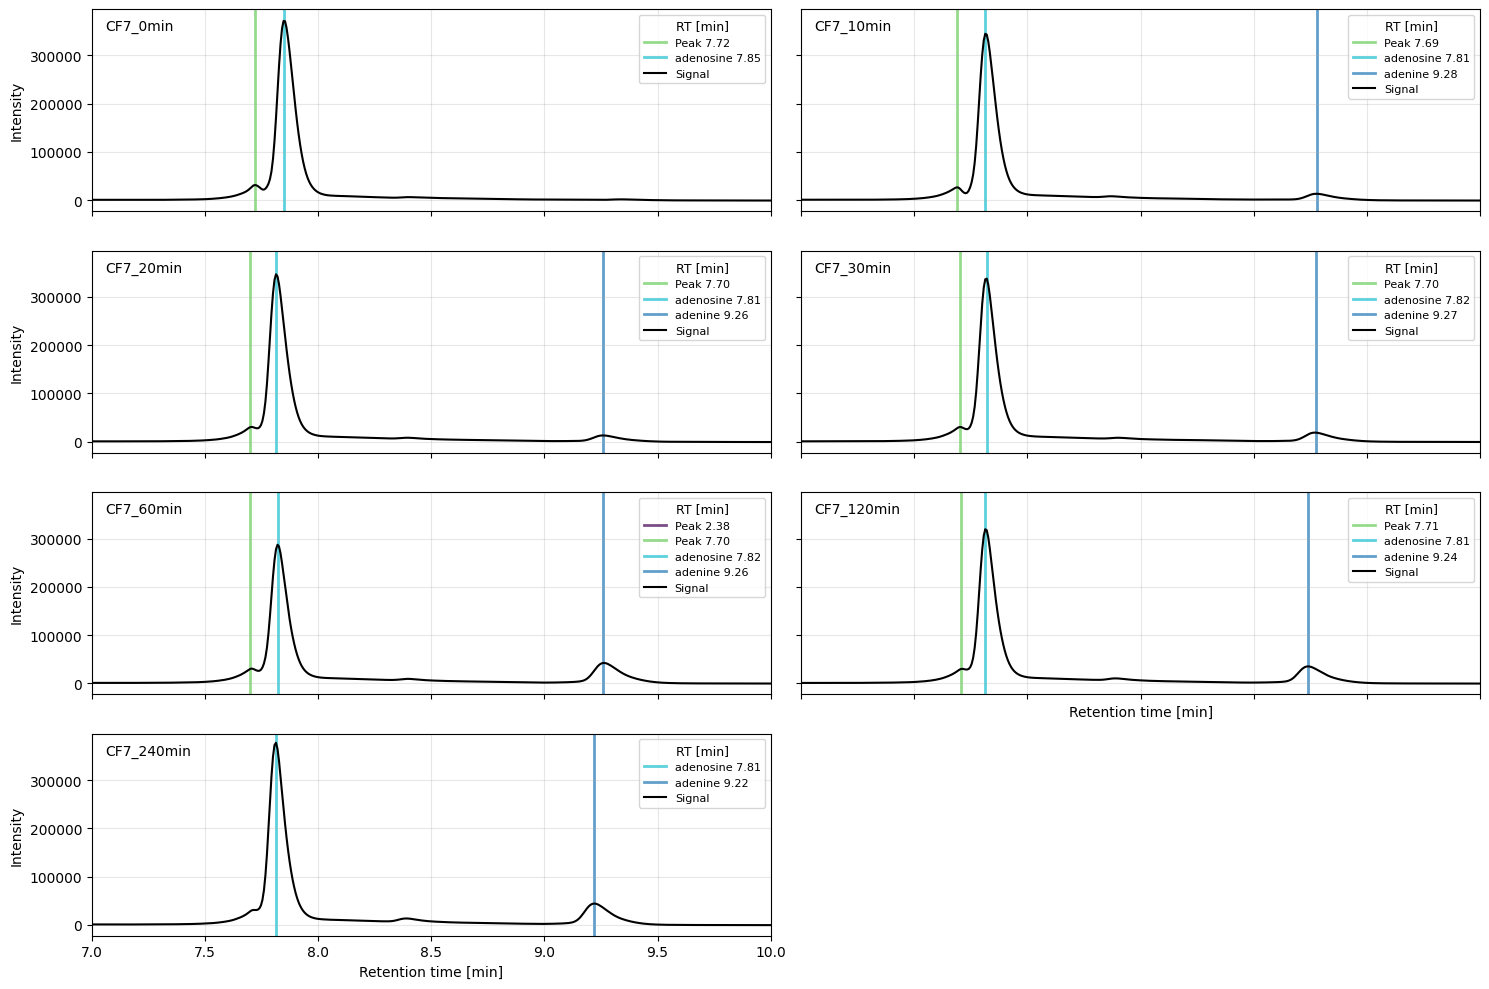

Loaded 7 chromatograms.


             🎯 Peak Assignment Summary of CF10              
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Molecule              ┃   Status   ┃ Details              ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ adenine (adenine)     │ 🟡 Partial │ (6/7) peaks assigned │
│ adenosine (adenosine) │ ✅ Success │ (7/7) peaks assigned │
└───────────────────────┴────────────┴──────────────────────┘

Loaded data/hplc/kinetics/CF10


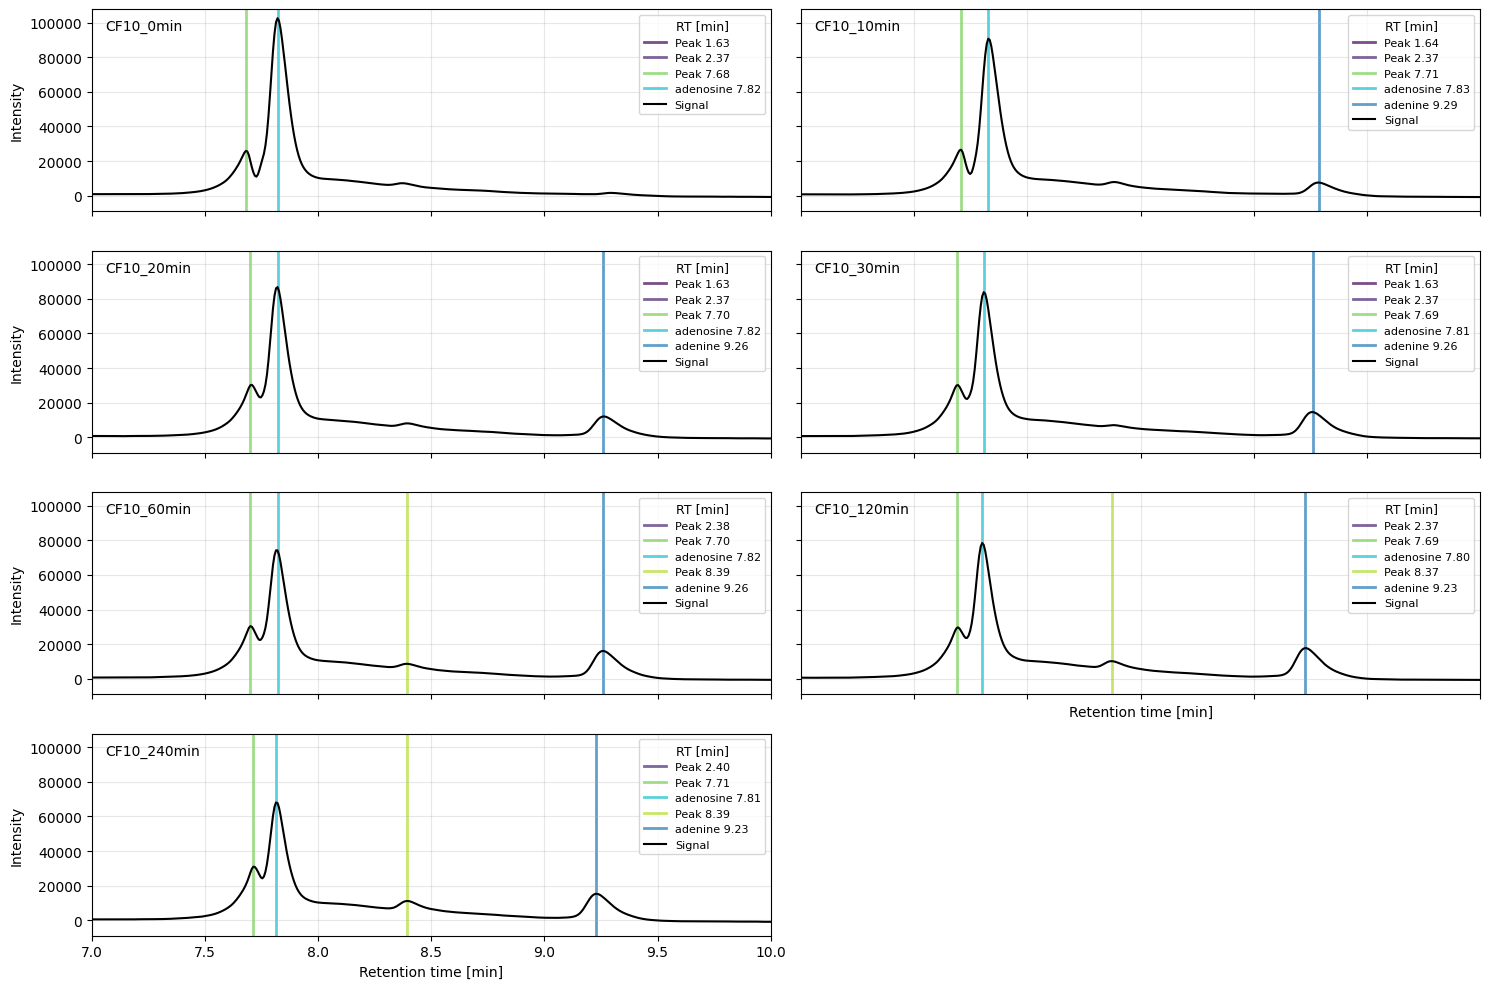

In [10]:
kinetic_dir = Path("data/hplc/kinetics")

ph = 7.4
temp = 37
temp_unit = "deg_C"

# iterate over kinetic data
handlers = []
for sample_dir in kinetic_dir.iterdir():
    handler = ch.Handler.read_asm(
        path=sample_dir,
        ph=ph,
        temperature=temp,
        temperature_unit=temp_unit,
        mode="timecourse",
    )

    # add molecules to handler
    handler.add_molecule(adenine, inits.loc[sample_dir.name, "adenine"])
    handler.add_molecule(adenosine, inits.loc[sample_dir.name, "adenosine"])

    # add protein
    handler.add_protein(SAHH, inits.loc[sample_dir.name, "SAHH"], conc_unit="umol/l")

    # assign peaks
    handler.assign_all_peaks()

    print(f"Loaded {sample_dir}")
    handler.visualize(rt_min=7, rt_max=10)
    handlers.append(handler)

In [11]:
enzmldoc = ch.to_enzymeml(
    document_name="kinetic",
    handlers=handlers,
    calculate_concentration=True,
    extrapolate=True,
)

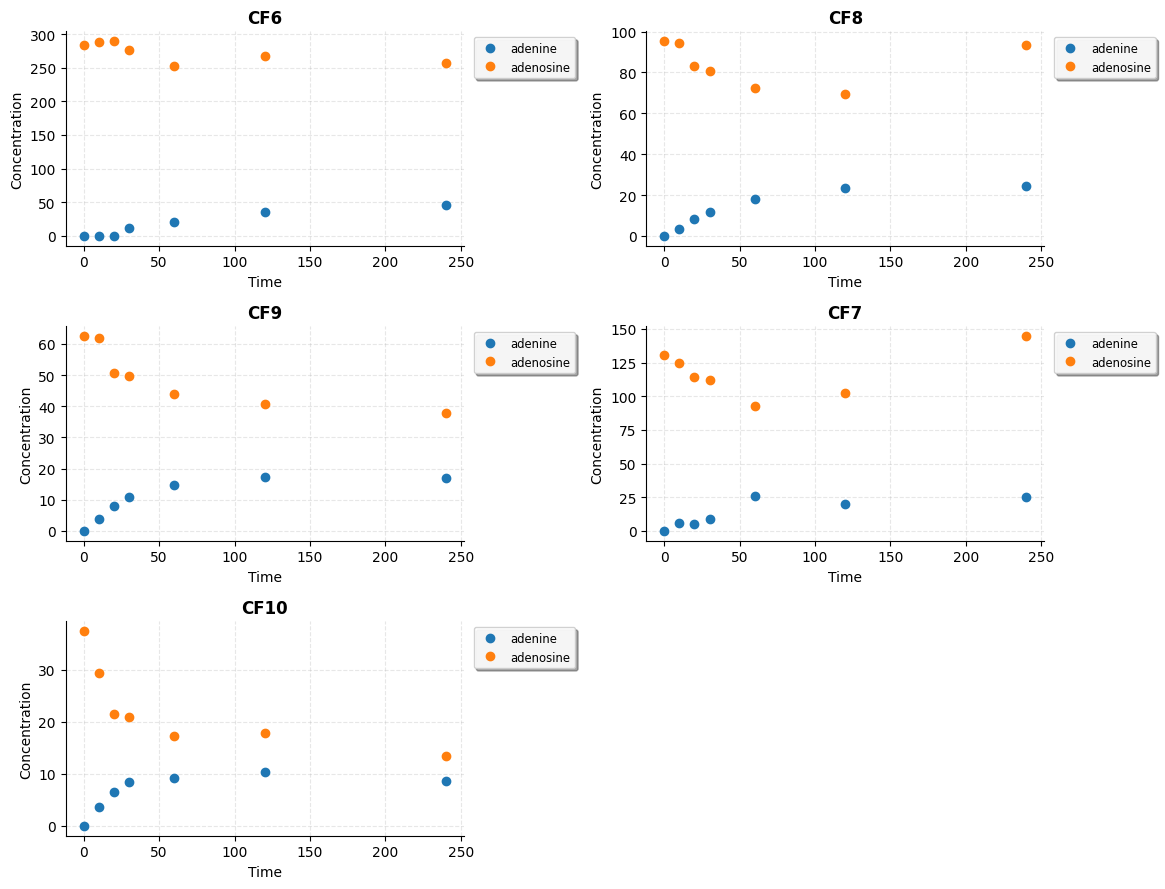

In [12]:
import pyenzyme as pe

fig, ax = pe.plot(enzmldoc)

In [13]:
pe.write_enzymeml(enzmldoc, "data/enzymeml.json")

EnzymeML document written to data/enzymeml.json